In [5]:
import pickle
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import random
import json
import os
import re
import seaborn as sns
import math

In [14]:
def read_sum_data(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='caida0517-125w_10_.pcap', window_size=200):
    res = []
    for epoch in epochs:
        
        path = f"../SketchPatternQuery/{algo}/{dataset}/"\
                f"{flowkey}/row_{row}_width_{width}_level_{level}_epoch_{epoch}_count_{count}_seed_{seed}/"
        
        for dir in sorted(os.listdir(path)):
            p = os.path.join(path, dir)
            if os.path.isdir(p): 
                window_dir = "window_" + str(window_size)
                dynamic_full_path = os.path.join(path, dir, window_dir, "dynamic_topk_summation.txt")    
                  
                with open(dynamic_full_path, 'r') as f:
                    line = f.readline().strip()
                    dynamic_list = [int(num) for num in line.split()]
                    res.append(dynamic_list)
            
    return res

# read_sum_data()

## Prepare Dataset

In [7]:
## parameters

caida0517 = ["caida0517-500w", "caida0517-250w", "caida0517-125w"]
caida0816 = ["caida0816-600w", "caida0816-300w", "caida0816-150w"]
zipf2a = ["zipf2a-150w", "zipf2a-75w", "zipf2a-35w"]
zipf2b = ["zipf2b-400w", "zipf2b-200w", "zipf2b-100w"]
zipf4 = ["zipf4-60w", "zipf4-30w", "zipf4-15w"]


lens = [
        # ["5", "5"],
        ["6", "4"],
        # ["7", "3"],
        # ["8", "2"],
        ]

pcap_file = []
    
# # single dataset
pcap_file.append("caida0517-500w_10_.pcap")
# pcap_file.append("caida0517-250w_10_.pcap")
# pcap_file.append("caida0517-125w_10_.pcap")
# pcap_file.append("caida0816-600w_10_.pcap")
# pcap_file.append("caida0816-300w_10_.pcap")
# pcap_file.append("caida0816-150w_10_.pcap")
# pcap_file.append("zipf2a-150w_10_.pcap") 
# pcap_file.append("zipf2a-75w_10_.pcap") 
# pcap_file.append("zipf2a-35w_10_.pcap") 
# pcap_file.append("zipf2b-400w_10_.pcap") 
# pcap_file.append("zipf2b-200w_10_.pcap") 
# pcap_file.append("zipf2b-100w_10_.pcap") 
# pcap_file.append("zipf4-60w_10_.pcap")
# pcap_file.append("zipf4-30w_10_.pcap")
# pcap_file.append("zipf4-15w_10_.pcap")


# # # same dist, caida
# for a in caida0517:
#     for b in caida0816:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
# for a in caida0816:
#     for b in caida0517:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
# # # same dist, zipf
# for a in zipf2a:
#     for b in zipf2b:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
# for a in zipf2b:
#     for b in zipf2a:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')

# # # diff dist, caida + zipf2a
# for a in caida0517:
#     for b in zipf2a:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
# for a in caida0816:
#     for b in zipf2a:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
# # # # diff dist, caida + zipf2b
# for a in caida0517:
#     for b in zipf2b:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
# for a in caida0816:
#     for b in zipf2b:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
# # # # diff dist, caida + zipf4
# for a in caida0517:
#     for b in zipf4:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
# for a in caida0816:
#     for b in zipf4:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')

# # # diff dist, zipf2a + caida
# for a in zipf2a:
#     for b in caida0517:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
#     for b in caida0816:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
# # # diff dist, zipf2b + caida
# for a in zipf2b:
#     for b in caida0517:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
#     for b in caida0816:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
# # # diff dist, zipf4 + caida
# for a in zipf4:
#     for b in caida0517:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
#     for b in caida0816:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')

# # # # diff dist, zipf 2a + zipf4
# for a in zipf2a:
#     for b in zipf4:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
# for a in zipf4:
#     for b in zipf2a:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
# # # # diff dist, zipf 2b + zipf4
# for a in zipf2b:
#     for b in zipf4:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
# for a in zipf4:
#     for b in zipf2b:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
            
            
print(pcap_file)    
print(f'Total Pcap File Number: {len(pcap_file)}')
# widths = [2048, 4096, 8192, 16384, 32768, 65536, 131072]
widths = [4096]
# widths = [1024]



['caida0517-500w_10_.pcap']
Total Pcap File Number: 1


### Plot Dynamic TopK

In [23]:
def plot_dynamic_topk_variation(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='zipf2a_3_caida20180517_7.pcap', window_size=200):

    labels = ["Dynamic TopK Density"]

    res = []
    # sum
    result = read_sum_data(algo, row, width, level, seed, count, flowkey, epochs, dataset, window_size)[0]
    
    # res.append(result)
    
    # variation
    fin_res_var = [None]
    for i in range(1, len(result)):
        print((result[i] - result[i-1]))
        fin_res_var.append(int((result[i] - result[i-1])/100))
    # pri
        
    res.append(fin_res_var)
    
    # second variation
    # fin_sec_res_var = [None, None]
    # for i in range(2, len(result)):
    #     fin_sec_res_var.append(abs(fin_res_var[i] - fin_res_var[i-1]))
        
    # res.append(fin_sec_res_var)
    
    print(labels, len(labels))
    print(res, len(res))
    print(result)
    print(fin_res_var)
    # print(fin_sec_res_var, len(res))
    # print(f'max: {max(fin_res_var[1:])}, avg: {sum(fin_res_var[1:])/len(fin_res_var[1:])}, diff: {max(fin_res_var[1:]) - (sum(fin_res_var[1:])/len(fin_res_var[1:]))}')
    
    plt.figure(figsize=(12, 4))
    
    # sns.lineplot(data=res, dashes=False, markers=True, markersize=4)
    # for i, data_set in enumerate(res):
    #     plt.plot(range(1,21), data_set, label=f'Data Set {i + 1}')
        
    # print(dataset)
    for i in range(len(res)):
        plt.plot(res[i], label=labels[i])
        

    # Add labels and legend
    plt.xlabel('Time (sec)')
    plt.ylabel('Ratio')
    plt.title('%s Dynamic TopK Density (Window Size = %d)' % (dataset[:-5], window_size))
    # plt.axhline(10000, c="black")
    ticks = [i for i in range(int(10*1000/window_size) + 1)]
    adjusted_ticks = [tick * (window_size / 1000) for tick in ticks[0::int(1000 / window_size)]]
    plt.xticks(ticks[0::int(1000/window_size)], adjusted_ticks)
    plt.legend(loc='upper left', ncol=math.ceil(len(res)/4))

    # Show the plot
    plt.show()
    

83980
74949
50330
67429
67736
67617
71951
73199
74524
71701
79476
76046
75227
81076
76579
70089
71639
66513
68962
69981
70056
70941
66132
71299
76220
65865
68583
70624
70255
69597
70338
72846
72844
65866
70248
69029
73592
76796
75141
75265
77131
80369
76446
78028
66911
76747
70808
43523
['Dynamic TopK Density'] 1
[[None, 839, 749, 503, 674, 677, 676, 719, 731, 745, 717, 794, 760, 752, 810, 765, 700, 716, 665, 689, 699, 700, 709, 661, 712, 762, 658, 685, 706, 702, 695, 703, 728, 728, 658, 702, 690, 735, 767, 751, 752, 771, 803, 764, 780, 669, 767, 708, 435]] 1
[0, 83980, 158929, 209259, 276688, 344424, 412041, 483992, 557191, 631715, 703416, 782892, 858938, 934165, 1015241, 1091820, 1161909, 1233548, 1300061, 1369023, 1439004, 1509060, 1580001, 1646133, 1717432, 1793652, 1859517, 1928100, 1998724, 2068979, 2138576, 2208914, 2281760, 2354604, 2420470, 2490718, 2559747, 2633339, 2710135, 2785276, 2860541, 2937672, 3018041, 3094487, 3172515, 3239426, 3316173, 3386981, 3430504]
[None, 839, 

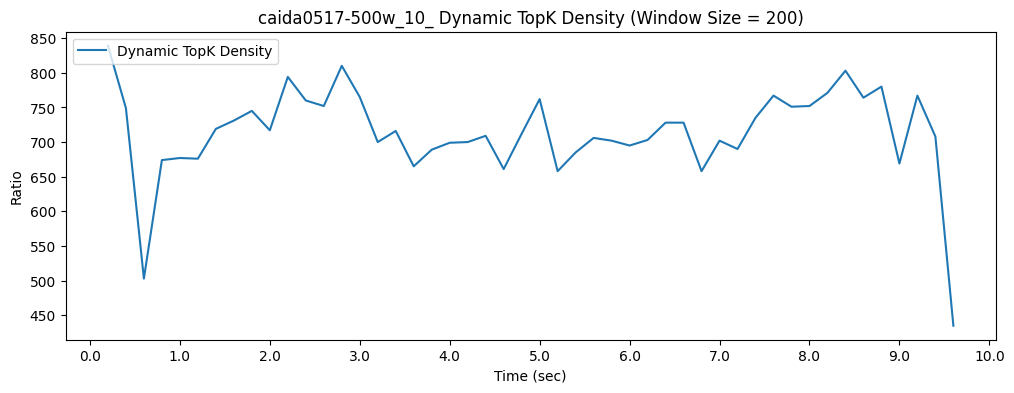

In [26]:
plot_dynamic_topk_variation(dataset=pcap_file[0], window_size=200)

In [8]:
def predict(algo='cm', row=3, width=[4096], level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], datasets=['zipf2a_3_caida20180517_7.pcap'], window_size=200, dev=3, ws=20):
    
    # top 100
    res_sum = {}
    res_var = {}
    # res_sec_var = {}
    
    label = []
    answer = []
    
    for d in datasets:
        for w in width:
            name = f'{d[:-5]}_{w}'
            res_var[name] = [None]
            # res_sec_var[name] = [None, None]
            
            res_total = read_sum_data(algo, row, w, level, seed, count, flowkey, epochs, d, window_size)

            label.append(name)
            answer.append(int(d.split('_')[1]))
            # answer.append(10)
            
            res_sum[name] = res_total
            
            for i in range(1, len(res_total)):
                res_var[name].append(res_total[i] - res_total[i-1])
                
            # for i in range(2, len(res_var[name])):
            #     res_sec_var[name].append(abs(res_var[name][i] - res_var[name][i-1]))
            
    # res = read_data(algo, row, width, level, seed, count, flowkey, epochs, dataset, type, window_size)
    # print(label, len(label))
    # print(res_sum, len(res_sum))
    # print(res_var, len(res_var))
    # print(res_sec_var, len(res_sec_var))
    
    # print(answer)
    ignore = int(1000/window_size)
    choose = 5
    # dev = 3.4 # 99.90%
    # dev = 3 # 99.90%
    # dev = 3.719 # 99.99%
    iqr = 1.5
    # ws = 20
    
    pred3 = []
    
    norm_hit3 = 0
    iqr_hit3 = 0
    
    hit3 = []
    
    for i in range(len(label)):
        
        var_hit, time_var, sec_var_hit, time_sec_var, val, max_time = changes_occured(res_var3[label[i]][1:], res_sec_var3[label[i]][2:], dev, ws)
        
        pred3.append(time_sec_var)
           
        print(i)
        print(label[i])
        print('\tTotal Flow ')
        # print('\t\t', var_max3, var_avg3, var_diff3)
        # print('\t\t', max(res_sec_var3[label[i]][(1+ignore):end]), sum(res_sec_var3[label[i]][(1+ignore):end]) / len(res_sec_var3[label[i]][(1+ignore):end]), max(res_sec_var3[label[i]][(1+ignore):end]) - (sum(res_sec_var3[label[i]][(1+ignore):end]) / len(res_sec_var3[label[i]][(1+ignore):end])))
        print('\t\t', res_sec_var[label[i]])
        print(f'\t\tvar: {time_var}, ans: {answer[i]}, change: {var_hit}')
        print(f'\t\tsec var: {time_sec_var}, ans: {answer[i]}, change: {sec_var_hit}')
        print(f'\t\t{val}, max time: {max_time}')
        print()
        
        if answer[i] == 10:
            if sec_var_hit == 0:
                hit3.append(1)
            else:
                hit3.append(0)
        else:
            if sec_var_hit == 1:
                hit3.append(1)
            else:
                hit3.append(0)
            
        

    succ3 = 0

    for i in range(len(label)):
        if hit3[i] == 1:
            if answer[i] == 10:
                succ3 += 1
            else:
                if abs(pred3[i] - answer[i]) <= 1.0:
                    succ3 += 1
    
    print("single comprehensive predict")
    print(f' total flow  predict: {succ3}/{len(pred3)} {succ3*100/len(pred3)}%')
    print()
    
    
    
    
        
# predict_final_dynamic_topk(width=widths, datasets=pcap_file)